## Visualizing Geographical Data with heatmaps, and scatter density maps in Python

### New York Motor Vehicle Collisions Open Data - Visual Analysis of Persons Injured

##### Question: How do we map incidents in New York city using just the longitude, latitude and number of motor incident values? 

Data Source: https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95

In [89]:
#Created June 2017 @John Ryan
#-------------------
#Import required libs
#-------------------
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("C://Clusters//NYPD_Motor_Vehicle_Collisions_sample.csv")

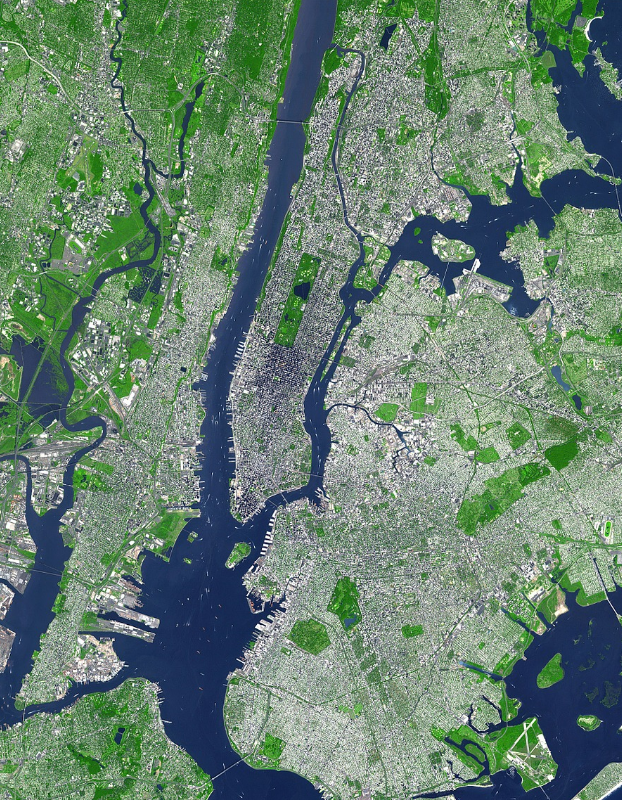

In [87]:
from IPython.display import Image
Image("C:\\Clusters\\new-york-city.PNG",  width=500, height=600)
source: www.pixabay.com

In [90]:
#view the first 2 rows of the pandas data frame. 
#The data set contains 29 columns and 2,500 rows
data.head(2)

,DATE,TIME,BOROUGH,POPULATION %,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,12/14/2015,00:01,BRONX,5.1,10454.0,40.800342,-73.914189,"(40.8003425, -73.9141887)",EAST 132 STREET,WILLOW AVENUE,...,Unspecified,NaN,NaN,NaN,3353283,OTHER,OTHER,NaN,NaN,NaN
1,12/14/2015,09:23,MANHATTAN,3.7,10033.0,40.848393,-73.937672,"(40.8483929, -73.9376716)",BROADWAY,WEST 178 STREET,...,Unspecified,NaN,NaN,NaN,3352580,PASSENGER VEHICLE,OTHER,NaN,NaN,NaN


#### Plotting the Geographical Locations of all New York districts
##### (Longitude and Latitude)

Insight can be easly generated from simply creating a geographic scatter plot using the location values and the counts of number of incidents or persons/motorists injured for a specific period.We use a scatter plot to display the new york region in terms of motor vehicle incident over a period of one year, see how the dots form the outline or general shape of the city.

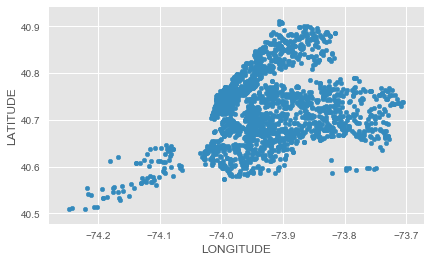

In [91]:
#we use a scatter plot to display the new york region in terms of motor vehicle incident over a period of one year, 
#see how the dots form the outline or general shape of the city.
data.plot(kind = "scatter", x = "LONGITUDE", y="LATITUDE")

#### Scatter Plot:  Manhattan - Number of Persons Injured

The image below indicates that the number of motor incidents in New York city is related to location and urban population density. We can see from the graph below a dense cluster of incidents in central manhattan between (LAT 40.8,40.7 and LON -74.0 and -73.9). However given the number of incidents high in volume the severity is seen to be minor mostly between the range of 0 - 1.5. Most sever incidents where people are injured or a death occurs are located in the districts outside metropoliton Manahattan.

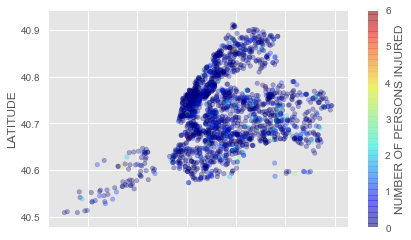

In [92]:
# Increasing the alpa value from 0.1 to 0.3 allows for a better view of clustered data 
data.plot(kind = "scatter", x = "LONGITUDE", y="LATITUDE", alpha =0.3,
         c = "NUMBER OF PERSONS INJURED", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

#### Increase radius of data point circles by population %

We include the population % to add an extra dimension to the scatter plot 
and allows lower populated areas to be filtered out with geather emphasis on larger populated areas.

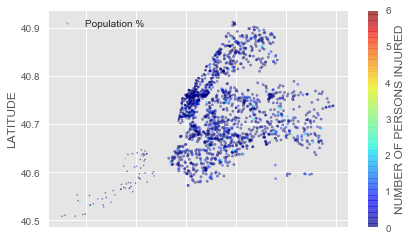

In [96]:
data.plot(kind = "scatter", x = "LONGITUDE", y="LATITUDE", alpha =0.4,
         s = data["POPULATION %"], label = "Population %",
         c = "NUMBER OF PERSONS INJURED", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

#### Scatter Plot: Manhattan - Number of Pedestrians Injured

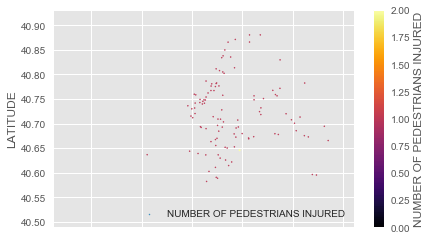

In [102]:
data.plot(kind = "scatter", x = "LONGITUDE", y="LATITUDE", alpha =0.9,
         s = data["NUMBER OF PEDESTRIANS INJURED"], label='NUMBER OF PEDESTRIANS INJURED',
         c = "NUMBER OF PEDESTRIANS INJURED", cmap=plt.get_cmap("inferno"), colorbar=True)
plt.legend()

#### Scatter Plot: Manhatten - Number of Motorists Injured

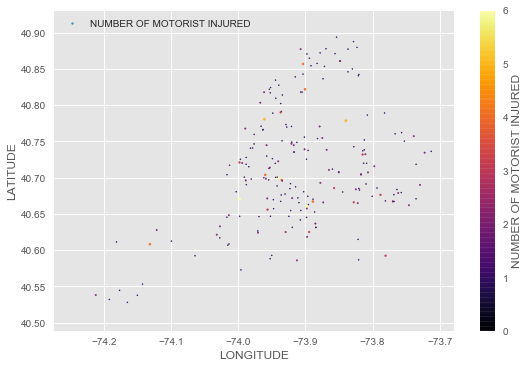

In [66]:
plt.style.use('ggplot')
data.plot(kind = "scatter", x = "LONGITUDE", y="LATITUDE", alpha =0.9,
         s = data["NUMBER OF MOTORIST INJURED"], label='NUMBER OF MOTORIST INJURED',
         c = "NUMBER OF MOTORIST INJURED", cmap=plt.get_cmap("inferno"), colorbar=True)
plt.legend()

### Heat Map - New York Motor Vehicle Collisions - Persons Injured

When viewing the heat map below we can can get more insight and a better visual of some more severe incidents in manhatton which could not be seen in previous scatterplots. The red dots show locations of incidents where persons have been badly injured.

##### Resolution:
resolution of boundary database to use. Can be c (crude), l (low), i (intermediate), h (high), f (full) or None. If None, no boundary data will be read in (and class methods such as drawcoastlines will raise an if invoked). Resolution drops off by roughly 80% between datasets. https://matplotlib.org/basemap
##### Projection:
Mercator is a cylindrical, conformal projection. Very large distortion at high latitudes, cannot fully reach the polar regions.https://matplotlib.org/basemap

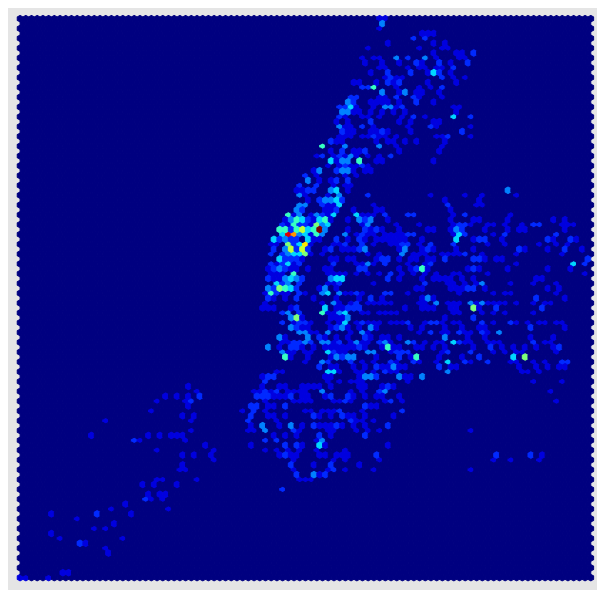

In [72]:
from mpl_toolkits.basemap import Basemap
import matplotlib.cm as cm
#compute the north east west and south boundaries
west, south, east, north = [-74.26, 40.50, -73.70, 40.92]
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
#Here we tell basemap to assign a projection of 
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north, llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='f')
# compute the native map projection coordinates for New York.
x,y = m(data['LONGITUDE'].values, data['LATITUDE'].values)
m.hexbin(x, y, cmap = 'jet');